<a href="https://colab.research.google.com/github/casjunior93/Projeto-Tera-IA---Previsao-de-obitos-por-covid-considerando-doencas-pre-existentes/blob/main/Covid_e_doen%C3%A7as_pr%C3%A9_existentes_em_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando o acesso ao Google Drive no Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bibliotecas fundamentais

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.



# Passo 1: Abordar o problema e analisar o panorama em geral

A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2. Seus principais sintomas são febre, cansaço e tosse seca. [(1)](https://www.paho.org/pt/covid19) O crescimento rápido de casos e óbitos por COVID-19 causou uma grande sobrecarga do sistema de saúde no Brasil. [(2)](http://cadernos.ensp.fiocruz.br/csp/artigo/1451/mortalidade-por-covid-19-padronizada-por-idade-nas-capitais-das-diferentes-regioes-do-brasil) Várias cidades brasileiras sofreram com a falta de leitos de UTI para casos graves de COVID-19, o que trouxe um dado alarmante: em 2021, 38% das mortes por covid ocorreram por falta de atendimento médico. [(3)](https://oglobo.globo.com/brasil/em-2021-38-dos-mortos-por-covid-em-hospitais-nao-chegaram-uti-1-24944189)

O objetivo desse modelo é prever se uma pessoa pode vir a óbito por covid-19 levando em consideração as doenças pré-existentes desta. Este modelo poderia ser útil para fazer a triagem de pacientes e o gerenciamento de leitos. Além disso, pode ser uma boa ferramenta para a prevenção de casos graves de COVID-19, gerando recomendações de vacinação, por exemplo, tendo em vista as diversas variantes do vírus que estão aparecendo e ao relaxamento das medidas de isolamento.

# Passo 2: Obter os dados

Os dados utilizados são referentes à população do estado de São Paulo e serão obtidos através da página [do site](https://www.seade.gov.br/coronavirus/) da Fundação SEADE - Sistema Estadual de Análise de Dados.

Dicionário: https://github.com/seade-R/dados-covid-sp#dicion%C3%A1rio-para-o-arquivo-de-casos-%C3%B3bitos-e-doen%C3%A7as-pr%C3%A9-existentes

Dados: https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/casos_obitos_doencas_preexistentes.csv.zip

## Dicionário

`codigo_ibge`	Código do município no IBGE (7 dígitos) de residência do paciente

`nome_munic`	Nome do município de residência do paciente

`idade`	Idade do paciente

`cs_sexo`	Sexo do paciente

`diagnostico_covid19`	Confirmação de COVID-19

`data_inicio_sintomas`	Data de início dos sintomas

`obito`	Indica se o paciente veio a óbito por COVID-19

`asma`	Paciente apresenta esse fator de risco (asma)

`cardiopatia`	Paciente apresenta esse fator de risco (cardiopatia)

`diabetes`	Paciente apresenta esse fator de risco (diabetes)

`doenca_hematologica`	Paciente apresenta esse fator de risco (doença hematológica)

`doenca_hepatica`	Paciente apresenta esse fator de risco (doença hepática)

`doenca_neurologica`	Paciente apresenta esse fator de risco (doença neurológica)

`doenca_renal`	Paciente apresenta esse fator de risco (doença renal)

`imunodepressao`	Paciente apresenta esse fator de risco (imunodepressão)

`obesidade`	Paciente apresenta esse fator de risco (obesidade)

`outros_fatores_de_risco`	Paciente apresenta outros fatores de risco

`pneumopatia`	Paciente apresenta esse fator de risco (pneumopatia)

`puerpera`	Paciente se encontra nesse estágio (puérpera)

`sindrome_de_down`	Paciente apresenta esse fator de risco (síndrome de down)

## Importação dos dados

In [4]:
%%time
df_completo = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv',
                          sep=';', encoding='utf-8', parse_dates=['data_inicio_sintomas'])

CPU times: user 32 s, sys: 2.4 s, total: 34.4 s
Wall time: 36.5 s


In [5]:
df_completo.head(5)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Matão,3529302,26.00,MASCULINO,CONFIRMADO,2020-10-25 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,Matão,3529302,60.00,MASCULINO,CONFIRMADO,2020-10-25 00:00:00+00:00,0,IGNORADO,SIM,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,Marília,3529005,57.00,MASCULINO,CONFIRMADO,2022-01-06 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Marília,3529005,28.00,FEMININO,CONFIRMADO,2022-01-06 00:00:00+00:00,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO
4,Marília,3529005,27.00,FEMININO,CONFIRMADO,2022-01-06 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [6]:
df_completo.shape

(5241454, 20)

Os registros com valores 'IGNORADO' correspondem a dados que não foram informados. Vamos tratá-los como valores nulos em primeiro momento. Para a construção do modelo, vamos utilizar uma amostra com os registros que estão completos.

Dataframe sem os dados com os campos com valor 'IGNORADO':

In [7]:
colunas = df_completo.columns
df_sem_ignorados = df_completo.copy()

for c in colunas:
  df_sem_ignorados.drop(df_sem_ignorados.loc[df_sem_ignorados[c]=='IGNORADO'].index, inplace=True)

df_sem_ignorados.shape


(178769, 20)

Salvando registros completos em csv:

In [8]:
import os  
os.makedirs('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid', exist_ok=True)  
df_sem_ignorados.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv') 

In [9]:
df_sem_ignorados.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
3,Marília,3529005,28.00,FEMININO,CONFIRMADO,2022-01-06 00:00:00+00:00,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO
18,Matão,3529302,81.00,MASCULINO,CONFIRMADO,2020-10-28 00:00:00+00:00,1,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,SIM,NÃO,NÃO
20,Matão,3529302,75.00,MASCULINO,CONFIRMADO,2020-10-28 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
61,Marília,3529005,72.00,MASCULINO,CONFIRMADO,2021-08-11 00:00:00+00:00,0,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
65,Matão,3529302,83.00,FEMININO,CONFIRMADO,2020-10-25 00:00:00+00:00,1,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO


In [13]:
print(f'Nosso conjunto de dados tem {df_sem_ignorados.shape[0]} registros.')

Nosso conjunto de dados tem 178769 registros.


# Passo3: Explorar os dados para obter informações úteis

In [14]:
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv', sep=',')
df = df_sem_ignorados

## Análise descritiva

In [15]:
df.describe(include='all')

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
count,178769,178769.00,178769.00,178769,178769,178760,178769.00,178769,178769,178769,178769,178769,178769,178769,178769,178769,178769,178769,178769,178769
unique,645,NaN,NaN,2,1,761,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2
top,São Paulo,NaN,NaN,MASCULINO,CONFIRMADO,2021-03-01 00:00:00+00:00,NaN,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
freq,36375,NaN,NaN,93926,178769,969,NaN,171121,98867,111021,176746,176520,168132,169439,172238,152389,107316,170140,177877,177953
first,NaN,NaN,NaN,NaN,NaN,2020-02-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-03-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3534148.64,61.74,NaN,NaN,NaN,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,17175.40,16.56,NaN,NaN,NaN,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3500105.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3518800.00,51.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informações obtidas através do método describe():

* Houve mais casos de COVID-19 confirmados na cidade de São Paulo.
* Os homens são a maioria dos casos.
* A maioria das pessoas tem cardiopatia.
* Com relação à outras doenças, a maioria das pessoas não tem estas.
* A média de óbitos dá uma indicação de que a maioria das pessoas da amostra não morreram.
* O intervalo de idade das pessoas é de 0 a 111 anos.

## Tipo dos dados

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178769 entries, 3 to 5241429
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   nome_munic               178769 non-null  object             
 1   codigo_ibge              178769 non-null  int64              
 2   idade                    178769 non-null  float64            
 3   cs_sexo                  178769 non-null  object             
 4   diagnostico_covid19      178769 non-null  object             
 5   data_inicio_sintomas     178760 non-null  datetime64[ns, UTC]
 6   obito                    178769 non-null  int64              
 7   asma                     178769 non-null  object             
 8   cardiopatia              178769 non-null  object             
 9   diabetes                 178769 non-null  object             
 10  doenca_hematologica      178769 non-null  object             
 11  doenca_hepat

## Visualização da feature idade

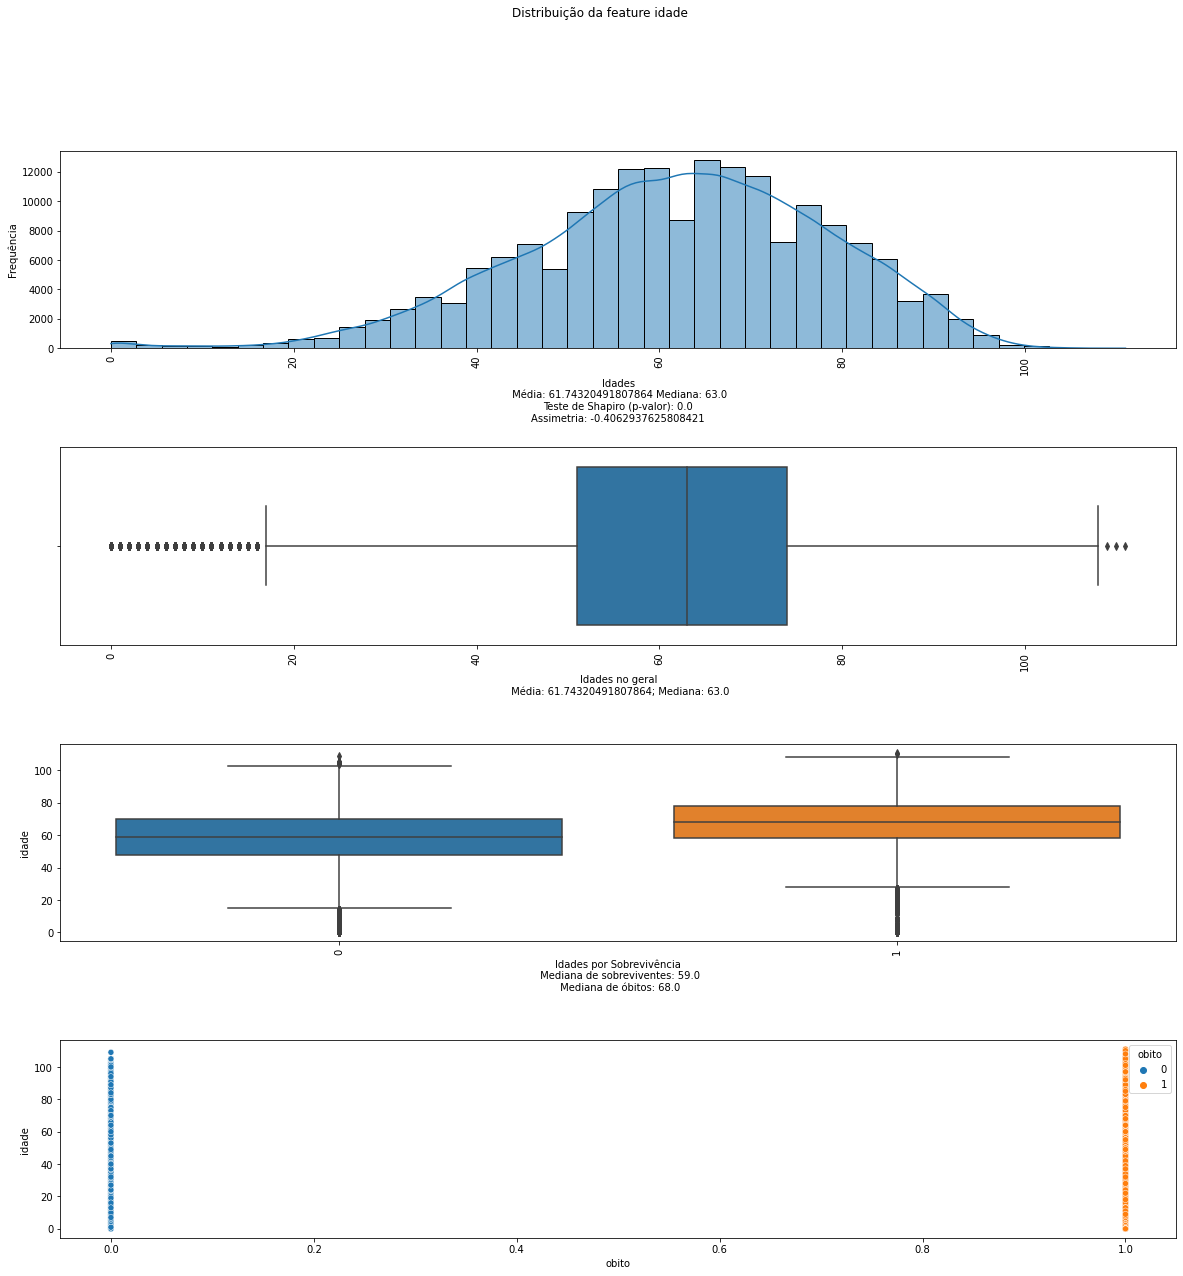

In [36]:
import scipy.stats as stats
stat,p = stats.shapiro(df['idade'].to_numpy())

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True, bins=40)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nTeste de Shapiro (p-valor): ' 
            + str(p) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* Há outliers com idades entre 0 e 16 anos e alguns outliers com mais de 110 anos. A média das idades é de aproximadamente 62 anos e a mediana é 63.
* O teste de Shapiro-Wilk indica que a distribuição de idades não é normal, pois p-value < 0.5.
* A assimetria negativa indica que existe uma maior concentração de valores na zona de idades mais elevadas da amostra.
* Os boxplots indicam que o grupo de sobreviventes tem mediana de 59 anos, e o grupo de óbitos tem mediana de 68 anos, o que indica que pessoas com maior idade concentram mais óbitos.
* A dispersão dos dados indicam que os dados tem pouca variabilidade entre os grupos de sobreviventes e de óbitos.